# IÐN303G Tæknileg kerfi - Sýnidæmi 3

## Inngangur
Markmiðið með þessu sýnidæmi er að sýna hvernig hægt er að nota control forritasafnið (e. library) til að skilgreina yfirfærsluföll og vinna með þau, þ.m.t. skoða tíma- og tíðnisvörun þeirra.

In [ ]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

Í control forritasafninu eru föll þar sem hægt er að nota til að skilgreina yfirfærsluföll.

Til dæmis eru yfirfærsluföllin

\begin{equation}
G_1(s)=\frac{3}{4s^2+s+1}
\end{equation}

og

\begin{equation}
G_2(s)=\frac{4.3}{1.6s+1}
\end{equation}

skilgreind á eftirfarandi hátt með fallinu tf. Athugið að stuðlar í teljara og nefnara eru gefnir sem vigrar þar sem talan lengst til hægri er stuðullinn fyrir $s^0$ og stuðullinn vinstra meginn við hann er fyrir $s^1$ og svo í hærra veldi af $s$ eftir því sem farið er lengra til vinstri.

In [ ]:
G1=ct.tf([3.],[4.,1.,1.])
G2=ct.tf([4.3],[1.6,1.])
print(G1)
print(G2)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      3
-------------
4 s^2 + s + 1

<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   4.3
---------
1.6 s + 1



Hægt er að tengja saman yfirfærsluföll, hvort heldur sem þau eru raðtengd, hliðtengd eða tengd með afturvirkni.

Ef föllin eru raðtengd þá eru þau margfölduð saman og ef þau eru hliðtengd má eru þau lögð saman. Það má líka nota
skipanirnar $series$ eða $parallel$. Ef föllin eru tengd saman með afturvirkni er notuð skipunin $feedback$.

In [ ]:
print(G1*G2)
print(ct.series(G1,G2))

<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


            12.9
-----------------------------
6.4 s^3 + 5.6 s^2 + 2.6 s + 1

<TransferFunction>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


            12.9
-----------------------------
6.4 s^3 + 5.6 s^2 + 2.6 s + 1



In [ ]:
print(G1+G2)
print(ct.parallel(G1,G2))

<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   17.2 s^2 + 9.1 s + 7.3
-----------------------------
6.4 s^3 + 5.6 s^2 + 2.6 s + 1

<TransferFunction>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   17.2 s^2 + 9.1 s + 7.3
-----------------------------
6.4 s^3 + 5.6 s^2 + 2.6 s + 1



In [ ]:
print(ct.feedback(G1,G2))

<TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


           4.8 s + 3
--------------------------------
6.4 s^3 + 5.6 s^2 + 2.6 s + 13.9



Á einfaldan hátt má skoða tímasvörun yfirfærslufalls, þ.e. svörun við einingaþrepafalli.

Text(0, 0.5, 'útslag')

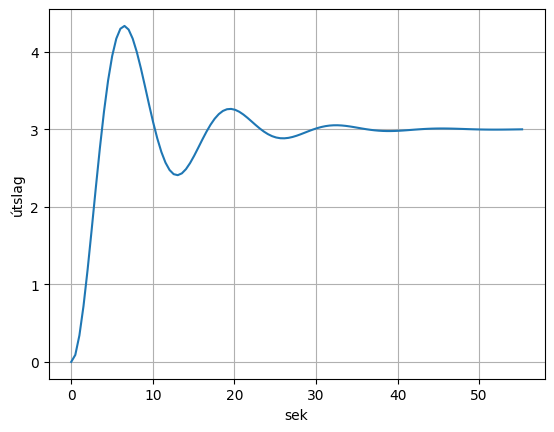

In [ ]:
t,y = ct.step_response(G1)
plt.plot(t,y)
plt.grid()
plt.xlabel('sek')
plt.ylabel('útslag')

Einnig má finna tíðnisvörun yfirfærslufalls og birta í svokölluðum Bode ritum sem sýna útslag og fasa sem fall af
horntíðni (rad/sek). Venjan er að hafa útslag og horntíðni á logaritmiskum kvarða.

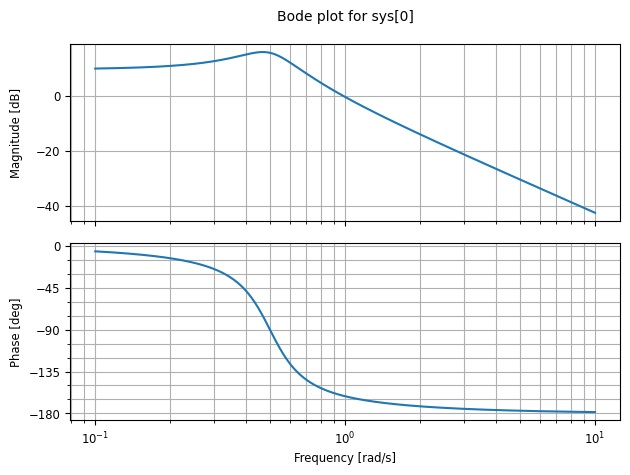

In [ ]:
ct.bode(G1, dB=True)

Það er líka hægt að hafa fasann í einingunni rad.

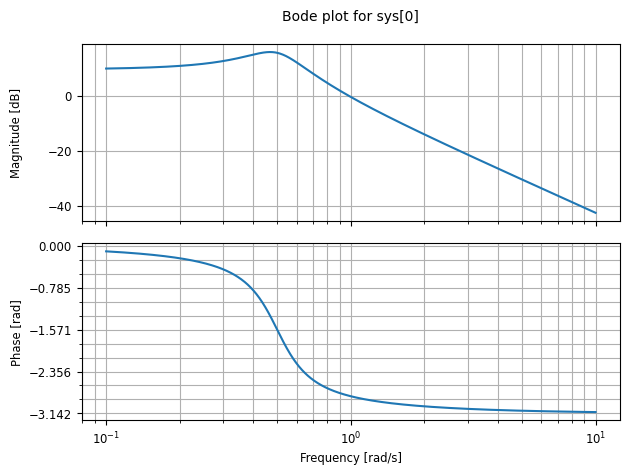

In [ ]:
ct.bode(G1, dB = True, deg=False)

Það má líka teikna niðurstöðuna sem bode fallið skilar á línulegum kvarða.

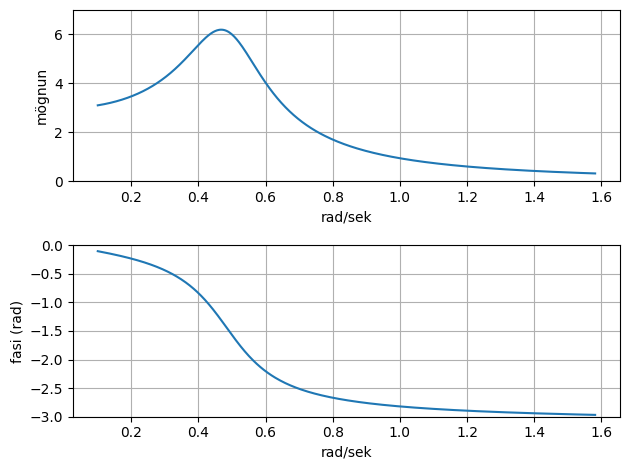

In [ ]:
mag, phase, omega = ct.frequency_response(G1)
fig, axs = plt.subplots(2, 1)
axs[0].plot(omega[:600],mag[:600])
axs[0].set_ylim(0, 7)
axs[0].set_xlabel('rad/sek')
axs[0].set_ylabel('mögnun')
axs[0].grid(True)

axs[1].plot(omega[:600],phase[:600])
axs[1].set_ylim(-3, 0)
axs[1].set_xlabel('rad/sek')
axs[1].set_ylabel('fasi (rad)')
axs[1].grid(True)

fig.tight_layout()
plt.show()

Skoða stöðugleika

Mögnunaröryggi:  inf
 Fasaöryggi: 19.05
 omega_pi:  nan
 omega_c: 0.98


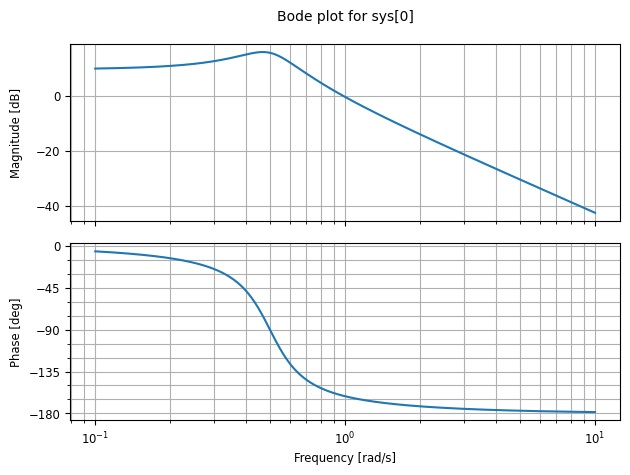

In [ ]:
G_K = ct.series(G1) # Vel sem yfirfærslufall lykkjunnar (sjá kafla 17 í hefti)
ct.bode(G_K, dB=True)
gm, pm, wcg, wcp = ct.margin(G_K)
print("Mögnunaröryggi: %4.2f\n Fasaöryggi: %4.2f\n omega_pi: %4.2f\n omega_c: %4.2f" % (gm,pm,wcg,wcp))

Mögnunaröryggi: 2.00
 Fasaöryggi: 15.55
 omega_pi: 2.24
 omega_c: 1.55


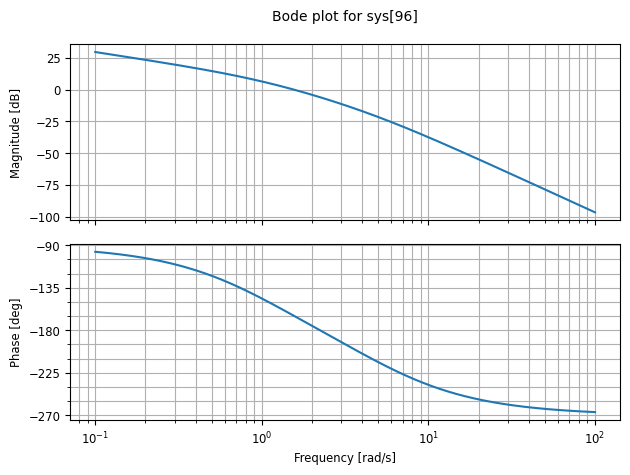

In [ ]:
tau = 0.2
G_C = 3
G_P = ct.series(ct.tf([1],[1, 0]),ct.tf([1],[1, 1]))
G_S = ct.tf([1],[tau, 1])
G_K = ct.series(G_C, G_P, G_S) # Yfirfærslufall lykkjunnar (sjá kafla 17 í hefti)
ct.bode(G_K, dB = True)
gm, pm, wcg, wcp = ct.margin(G_K)
print("Mögnunaröryggi: %4.2f\n Fasaöryggi: %4.2f\n omega_pi: %4.2f\n omega_c: %4.2f" % (gm,pm,wcg,wcp))
